### Ejercicio 1: Preparación del ambiente de trabajo


In [1]:
#importación de librerías clásicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv('ames_housing.csv').drop(columns=['Unnamed: 0'], axis=1)

In [3]:
df.shape

(2930, 81)

In [4]:
df.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899


### Ejercicio 2: Importación de archivos serializados


In [5]:
#importamos los conjuntos de entrenamiento y validación personal

import pickle
pickle_dectree = open('esteban_gonzalez-act07.sav',"rb")
pickle_in_xtrain = open('esteban_gonzalez-X_train.sav',"rb")
pickle_in_ytrain = open('esteban_gonzalez-y_train.sav',"rb")
pickle_in_xtest = open('esteban_gonzalez-X_test.sav',"rb")
pickle_in_ytest = open('esteban_gonzalez-y_test.sav',"rb")

In [6]:
model_mg = pickle.load(pickle_dectree)
x_train_mg = pickle.load(pickle_in_xtrain)
y_train_mg = pickle.load(pickle_in_ytrain)
x_test_mg = pickle.load(pickle_in_xtest)
y_test_mg = pickle.load(pickle_in_ytest)

In [7]:
#generamos las metricas de desempeño del modelo propio
print("Test MSE", mean_squared_error(y_test_mg, model_mg.predict(x_test_mg)).round(5))
print("Test MAE", median_absolute_error(y_test_mg, model_mg.predict(x_test_mg)).round(5))
print("Test R2", r2_score(y_test_mg, model_mg.predict(x_test_mg)).round(5))

Test MSE 1558833702.19112
Test MAE 15214.54264
Test R2 0.72573


In [8]:
#generamos los conjuntos de muestra y validación con la semilla pseudoaleatoria del compañero

#generamos la limpieza de datos
df_object=[]
#guardar todas las columnas que son objeto
for name in df.columns:
    if np.dtype(df[name]) == object:
        df_object.append(name)
        
df = pd.get_dummies(df, drop_first=True,columns=df_object)

#Particionamos la muestra inicial
X = df.drop(columns=['Sale_Price'], axis=1)
Y = df['Sale_Price']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X,Y,test_size=0.33,random_state=96310)

#generamos el primer modelo
dec_tree = DecisionTreeRegressor().fit(X_train_c, y_train_c)

#Seleccionamos los 10 atributos más importantes
importance = dec_tree.feature_importances_
sort_importance = np.argsort(importance)[::-1]

importancia = pd.DataFrame(importance)
importancia['atributos'] = X_train_c.columns.T
importancia.columns=('importancia','atributos')
df_10 = importancia.sort_values(by='importancia',ascending=False).head(10)
atributos_10 = importancia.sort_values(by='importancia',ascending=False).head(10)['atributos']

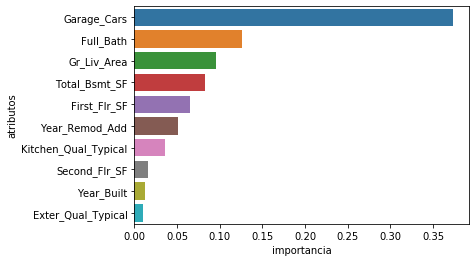

In [9]:
sns.barplot(data=df_10, x='importancia', y='atributos')

In [10]:
df_10_atr = pd.DataFrame(df, columns=atributos_10)

In [11]:
#Generamos el nuevo set de data de entrenamiento y testeo:
y = df['Sale_Price']
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(df_10_atr,y,test_size=0.33,random_state=96310)

#generamos la busqueda de grilla
get_params_model = GridSearchCV(DecisionTreeRegressor(),{'max_features': list(range(1,X_train_10.shape[1])), 'max_depth': np.linspace(1, 32, num=32, endpoint=True)},cv=5).fit(X_train_10,y_train_10)
get_params_model

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31.

In [12]:
#generamos las metricas de desempeño del modelo propio
print("Test MSE", mean_squared_error(y_test_10, get_params_model.predict(X_test_10)).round(5))
print("Test MAE", median_absolute_error(y_test_10, get_params_model.predict(X_test_10)).round(5))
print("Test R2", r2_score(y_test_10, get_params_model.predict(X_test_10)).round(5))

Test MSE 1525085858.38789
Test MAE 16590.90909
Test R2 0.77506


### Ejercicio 3: Evaluación Random Forest



In [13]:
#Importamos algunas librerías clasicas
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score,classification_report

#modelo inicial con los sets serializados personales
random_forest1 = RandomForestClassifier(random_state=15984).fit(x_train_mg, y_train_mg)

#generamos las metricas de clasificación
print("Test MSE", mean_squared_error(y_test_mg, random_forest1.predict(x_test_mg)).round(5))
print("Test MAE", median_absolute_error(y_test_mg, random_forest1.predict(x_test_mg)).round(5))
print("Test R2", r2_score(y_test_mg, random_forest1.predict(x_test_mg)).round(5))

Test MSE 2354981454.84902
Test MAE 20000.0
Test R2 0.58564


In [14]:
#para el modelo del compañero
#modelo inicial con los sets serializados personales
random_forest2 = RandomForestClassifier(random_state=78310).fit(X_train_10, y_train_10)

#generamos las metricas de clasificación
print("Test MSE", mean_squared_error(y_test_10, random_forest2.predict(X_test_10)).round(5))
print("Test MAE", median_absolute_error(y_test_10, random_forest2.predict(X_test_10)).round(5))
print("Test R2", r2_score(y_test_10, random_forest2.predict(X_test_10)).round(5))

Test MSE 2200779591.44571
Test MAE 21000.0
Test R2 0.6754


el desempeño general del modelo cae con respecto al arbol iniciaL, tambien para el compañero

### Ejercicio 4: Reporte las métricas de desempeño


In [15]:
randomf_grid=GridSearchCV(RandomForestClassifier(oob_score=True, random_state=34984),{'max_features':[None,"log2","sqrt"], 'max_depth': np.linspace(20, 1000, num=50, endpoint=True)},cv=2).fit(x_train_mg, y_train_mg)

In [16]:
randomf_grid.best_params_

{'max_depth': 40.0, 'max_features': None}

In [17]:
model_random_forest = RandomForestClassifier(max_depth=40, max_features="sqrt", random_state=15984).fit(x_train_mg, y_train_mg)

In [18]:
#generamos las metricas de clasificación
print("Test MSE", mean_squared_error(y_test_mg, model_random_forest.predict(x_test_mg)).round(5))
print("Test MAE", median_absolute_error(y_test_mg, model_random_forest.predict(x_test_mg)).round(5))
print("Test R2", r2_score(y_test_mg, model_random_forest.predict(x_test_mg)).round(5))

Test MSE 2220541612.67425
Test MAE 19500.0
Test R2 0.6093


el desempeño del modelo sigue bajando